<strong>Domain</strong>: Manufacturing<br/>
<strong>Objective(s)</strong>: 
<ul><li>Tackle curse of dimentionality</li>
    <li>Predict time it takes to pass testing</li></ul>
<strong>Dataset</strong>: Mercedes Benz greener manufacturing data provided in train.csv for training model and test.csv & sample_submission.csv for predicting and validation.<br/>
<strong>Attributes</strong>: This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.
The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.<br/>


### Let's start with importing train.csv and analyze it

In [118]:
#import libraries
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [119]:
path = "C:/Users/aarti_/machine_learning/projects/mercedes-benz-greener-manufacturing/"
df=pd.read_csv(path + 'train.csv')
df.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...   X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...      0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...      1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...      0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...      0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...      0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]

In [163]:
# Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [164]:
df.shape
df.size
cols = list(df)
df.columns

(4209, 365)

1536285

Index(['y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=365)

In [165]:
# Do dummy coding for the categorical features
for col in df.columns:
    if df[col].dtype =='object':
        df[col]=pd.Categorical(df[col]).codes

df.head(5)

y  X0  X1  X2  X3  X4  X5  X6  X8  X10  ...   X375  X376  X377  X378  \
0  130.81  32  23  17   0   3  24   9  14    0  ...      0     0     1     0   
1   88.53  32  21  19   4   3  28  11  14    0  ...      1     0     0     0   
2   76.26  20  24  34   2   3  27   9  23    0  ...      0     0     0     0   
3   80.62  20  21  34   5   3  27  11   4    0  ...      0     0     0     0   
4   78.02  20  23  34   5   3  12   3  13    0  ...      0     0     0     0   

   X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     1     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 365 columns]

In [123]:
#There are columns that have same value for all rows, we can just drop them
columns_to_drop = [];
cols = list(df)
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df.drop(cols_to_drop, axis=1, inplace=True)
df.shape

(4209, 366)

In [124]:
#We can get rid of ID from our dataframe as it is of no significance in analysis
df.drop('ID', axis=1, inplace=True)

In [125]:
#now is the time to define features and labels
X=df.drop("y", axis=1)
X.head(5)

y=df["y"]
X.describe()

X0  X1  X2  X3  X4  X5  X6  X8  X10  X12  ...   X375  X376  X377  X378  \
0  32  23  17   0   3  24   9  14    0    0  ...      0     0     1     0   
1  32  21  19   4   3  28  11  14    0    0  ...      1     0     0     0   
2  20  24  34   2   3  27   9  23    0    0  ...      0     0     0     0   
3  20  21  34   5   3  27  11   4    0    0  ...      0     0     0     0   
4  20  23  34   5   3  12   3  13    0    0  ...      0     0     0     0   

   X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     1     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 364 columns]

X0           X1           X2           X3           X4  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean     29.760751    11.113566    17.306486     2.919696     2.997862   
std      13.738338     8.531001    10.899914     1.739912     0.073900   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      19.000000     3.000000     8.000000     2.000000     3.000000   
50%      35.000000    13.000000    16.000000     2.000000     3.000000   
75%      43.000000    20.000000    25.000000     5.000000     3.000000   
max      46.000000    26.000000    43.000000     6.000000     3.000000   

                X5           X6           X8          X10          X12  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean     13.340223     6.807318    11.611309     0.013305     0.075077   
std       8.250832     2.916973     7.037888     0.114590     0.263547   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     6.000000     5.000000     0.000000     0.000000   
50%      15.000000     7.000000    11.000000     0.000000     0.000000   
75%      21.000000     9.000000    18.000000     0.000000     0.000000   
max      28.000000    11.000000    24.000000     1.000000     1.000000   

          ...              X375         X376         X377         X378  \
count     ...       4209.000000  4209.000000  4209.000000  4209.000000   
mean      ...          0.318841     0.057258     0.314802     0.020670   
std       ...          0.466082     0.232363     0.464492     0.142294   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...          0.000000     0.000000     0.000000     0.000000   
50%       ...          0.000000     0.000000     0.000000     0.000000   
75%       ...          1.000000     0.000000     1.000000     0.000000   
max       ...          1.000000     1.000000     1.000000     1.000000   

              X379         X380         X382         X383         X384  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.009503     0.008078     0.007603     0.001663     0.000475   
std       0.097033     0.089524     0.086872     0.040752     0.021796   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X385  
count  4209.000000  
mean      0.001426  
std       0.037734  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 364 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA5FCB6C50>,
      dtype=object)

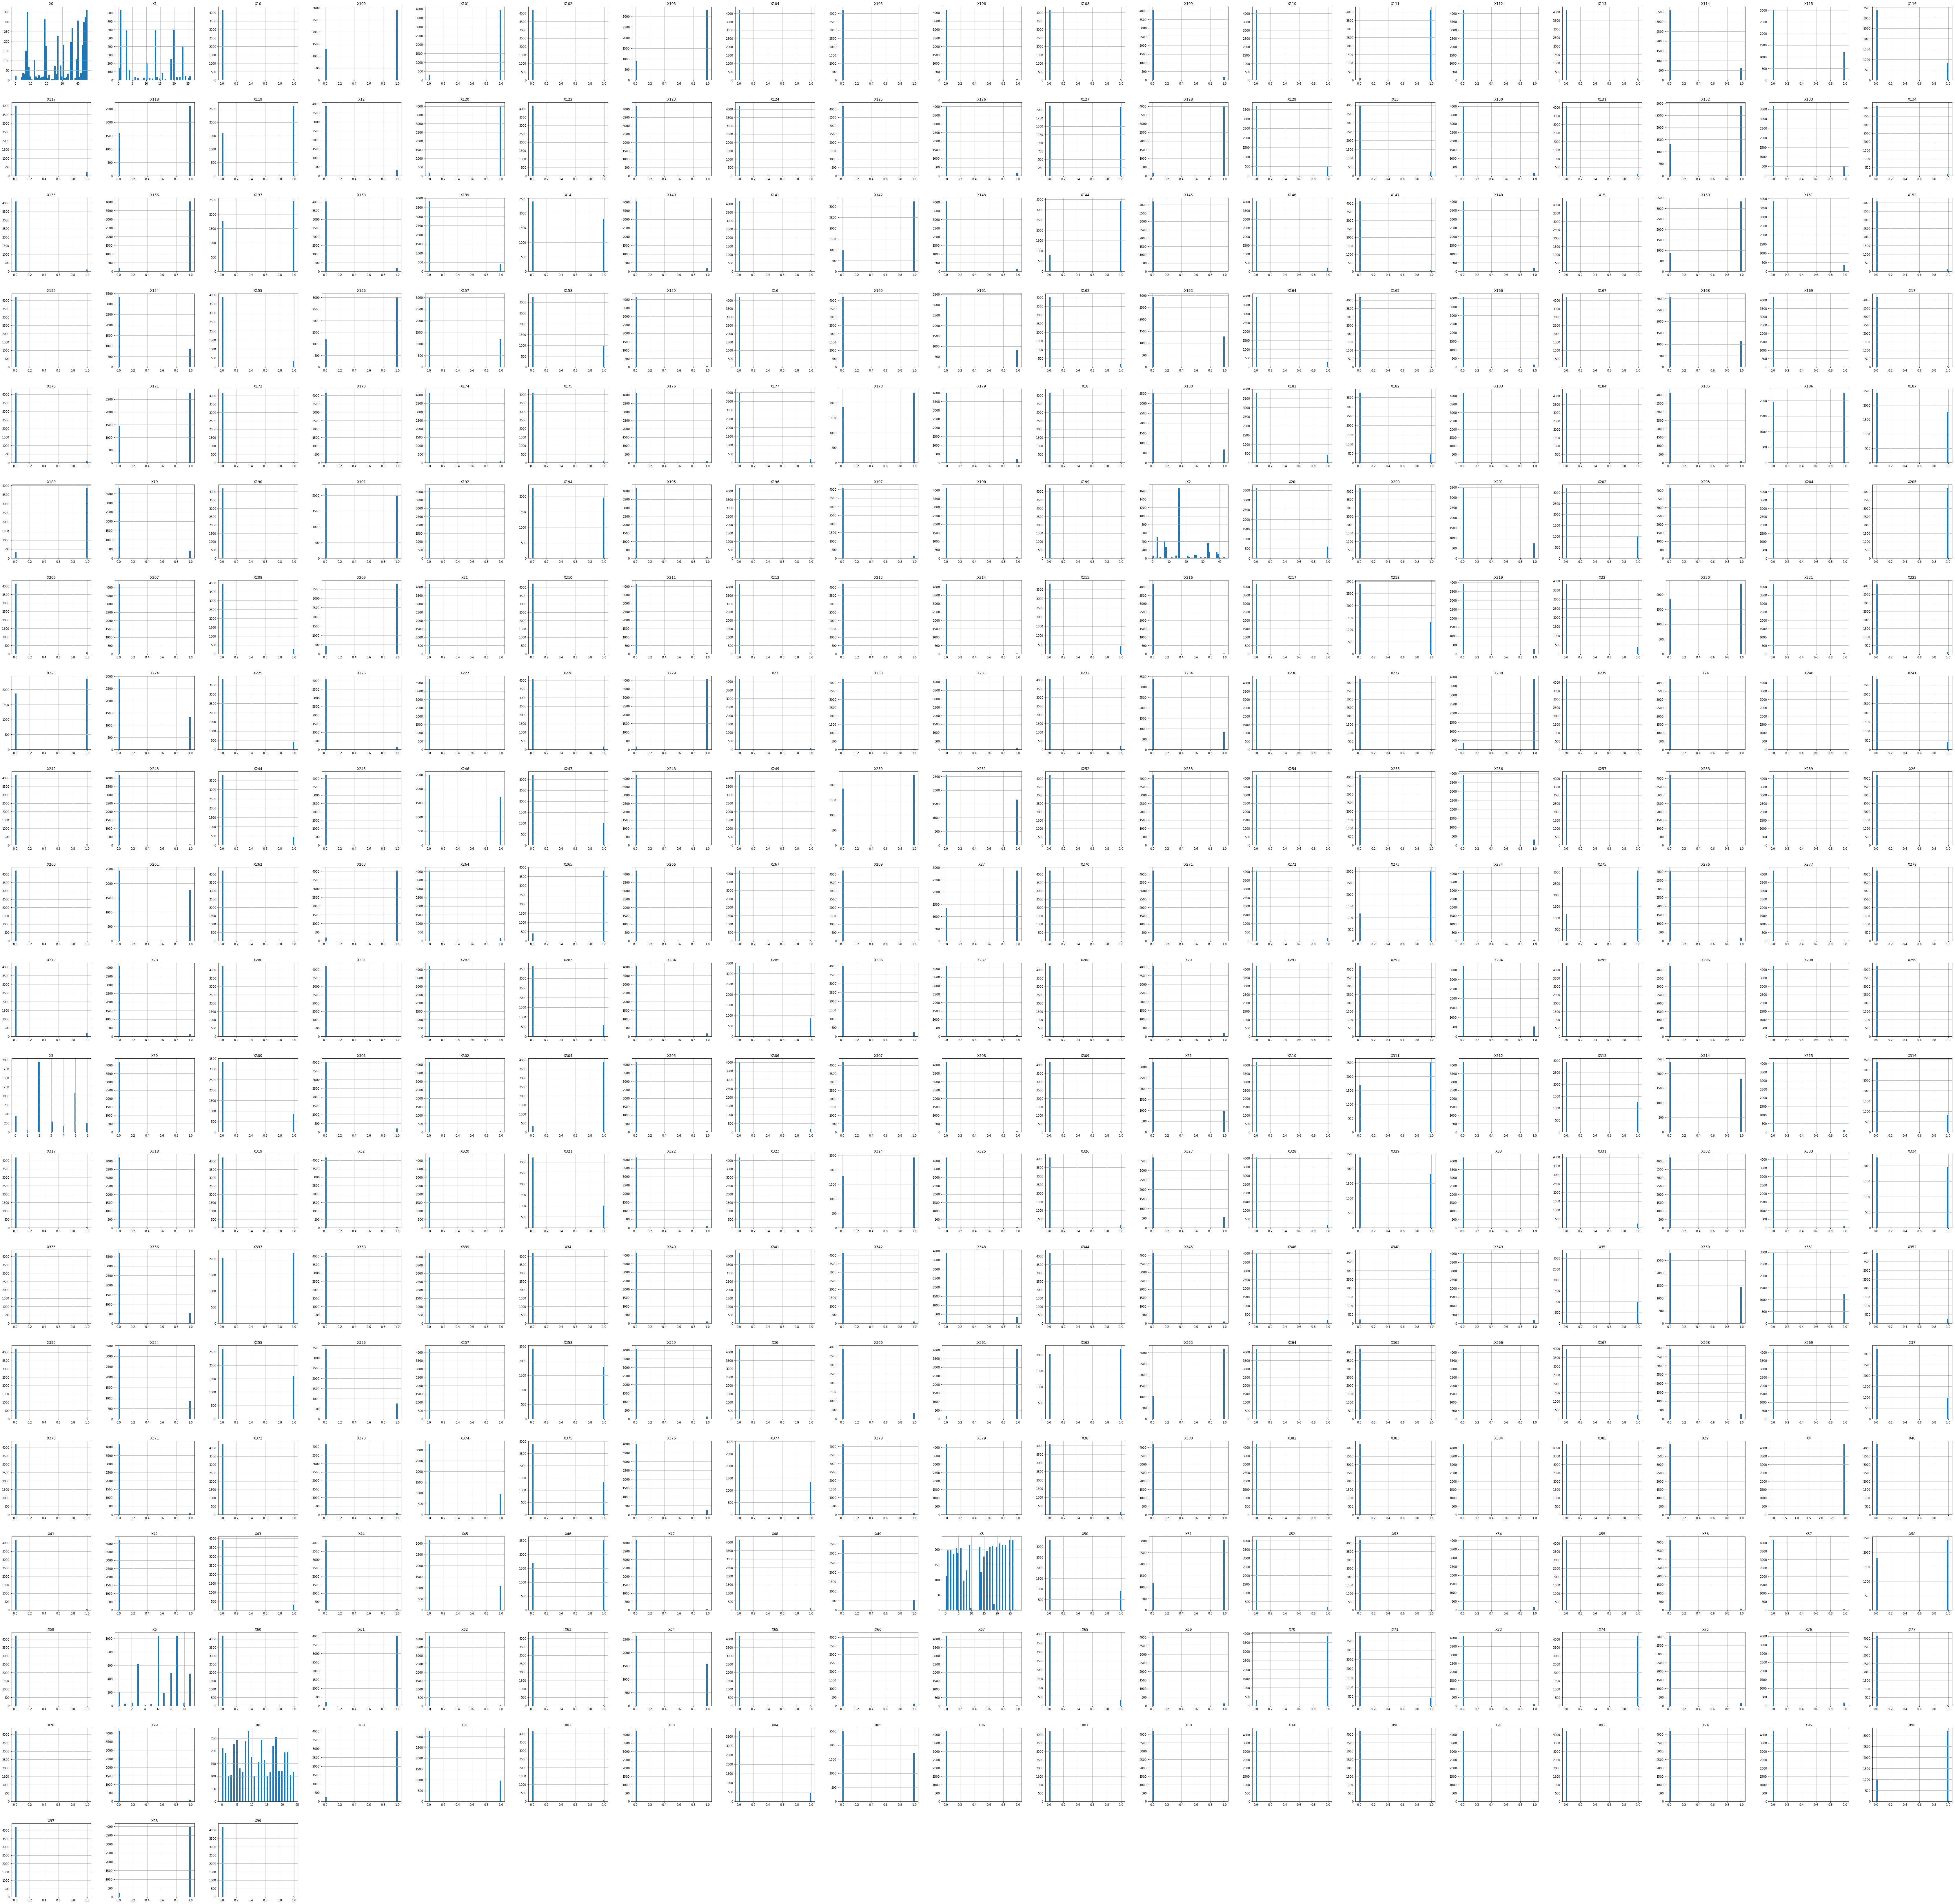

In [117]:
X.hist(bins = 50 , figsize = (120,120))
plt.show()

In [126]:
#In the above graphs, it looks like we have quite a few number of features that are correlated to each other.
#hence finding it here and drop the correlated columns

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[au_corr==1.000000]


def get_cols_to_drop(df):
    cols_to_drop = []
    corrs = get_abs_correlations(df)
    print(corrs)
    for i,j in corrs.index :
        cols_to_drop.append(j)
    return cols_to_drop

redundant_cols = get_cols_to_drop(X);
X.drop(redundant_cols, axis=1, inplace=True)

X.shape

X60   X253    1.0
X134  X147    1.0
X76   X136    1.0
X60   X385    1.0
X44   X302    1.0
X53   X102    1.0
X134  X222    1.0
X53   X214    1.0
X248  X253    1.0
      X385    1.0
X17   X382    1.0
X172  X216    1.0
X128  X130    1.0
X53   X239    1.0
X84   X244    1.0
X253  X385    1.0
X48   X222    1.0
X54   X136    1.0
X184  X262    1.0
X214  X239    1.0
X184  X266    1.0
X186  X194    1.0
X243  X320    1.0
X88   X320    1.0
X226  X326    1.0
X88   X243    1.0
X152  X326    1.0
      X226    1.0
X48   X147    1.0
      X134    1.0
             ... 
X33   X39     1.0
X71   X244    1.0
X202  X247    1.0
X90   X94     1.0
X204  X205    1.0
X31   X37     1.0
      X35     1.0
X118  X119    1.0
X29   X279    1.0
      X232    1.0
X58   X324    1.0
X364  X365    1.0
X112  X199    1.0
X113  X222    1.0
X90   X242    1.0
X295  X296    1.0
X298  X299    1.0
X113  X147    1.0
      X134    1.0
X60   X248    1.0
X122  X243    1.0
X232  X263    1.0
X71   X84     1.0
X125  X227    1.0
X62   X216

(4209, 312)

In [127]:
#Now, we gonna check the correlation between features
corr_matrix=X.corr();
corr_matrix

X0        X1        X2        X3        X4        X5        X6  \
X0    1.000000 -0.271123 -0.139904 -0.070645  0.017988  0.012293  0.037549   
X1   -0.271123  1.000000  0.088266  0.205657 -0.020724  0.046417 -0.079119   
X2   -0.139904  0.088266  1.000000 -0.093546  0.002289 -0.017722  0.065778   
X3   -0.070645  0.205657 -0.093546  1.000000  0.015298 -0.008161 -0.048468   
X4    0.017988 -0.020724  0.002289  0.015298  1.000000  0.039778  0.027854   
X5    0.012293  0.046417 -0.017722 -0.008161  0.039778  1.000000 -0.019917   
X6    0.037549 -0.079119  0.065778 -0.048468  0.027854 -0.019917  1.000000   
X8    0.047735 -0.000306 -0.069932 -0.001249 -0.008909  0.012746  0.018565   
X10   0.081122 -0.137193  0.042398  0.019663  0.003360 -0.006800  0.092986   
X12  -0.134577  0.112263  0.131464  0.056166  0.008245  0.060161 -0.099264   
X13  -0.130529  0.286683  0.222132 -0.216464  0.007179 -0.003452 -0.041825   
X14  -0.138310  0.079784 -0.079183  0.045183  0.005544 -0.003439  0.028516   
X15   0.011491 -0.023295 -0.001613 -0.024059  0.000631 -0.003542 -0.002297   
X16   0.003940 -0.005591 -0.020227 -0.008337 -0.061497 -0.032571  0.035292   
X17  -0.060401  0.120044  0.024392 -0.046271  0.002533 -0.031128  0.054548   
X18  -0.036495  0.068924 -0.060337 -0.028413  0.002572 -0.004646 -0.019988   
X19   0.203244 -0.207605 -0.312393 -0.068126  0.009622  0.009854  0.048629   
X20   0.030838  0.030153 -0.494692  0.073098 -0.015761  0.008522 -0.122983   
X21  -0.025532  0.069149 -0.018519 -0.032411  0.001481 -0.029751  0.003382   
X22   0.147904 -0.129648  0.444380 -0.188833  0.008931 -0.050032  0.035421   
X23   0.115098 -0.011723  0.115886  0.055659  0.004204 -0.033924  0.026774   
X24   0.001554 -0.022323 -0.008234 -0.048153  0.001263  0.008780 -0.000858   
X26  -0.006131 -0.004501  0.030495 -0.041311  0.002049 -0.024992  0.026645   
X27   0.050622 -0.048785  0.137151 -0.049081  0.021713  0.037836 -0.062026   
X28  -0.100412  0.127520  0.280952  0.162385  0.005308  0.026029 -0.003490   
X29  -0.149090  0.202989  0.209387  0.188854  0.006134  0.006306  0.013201   
X30   0.062321  0.035667 -0.076038  0.078486  0.001949  0.010111  0.006879   
X31   0.120973 -0.092994  0.110163 -0.080666  0.000695 -0.040828  0.019952   
X32   0.094024 -0.004861 -0.168747 -0.082171  0.003075  0.025765  0.058184   
X33   0.012613  0.021482 -0.001848 -0.008149  0.000446  0.018050  0.022160   
...        ...       ...       ...       ...       ...       ...       ...   
X350 -0.106772  0.152362 -0.230941  0.143553 -0.006459 -0.055928 -0.100208   
X351 -0.144929  0.157290  0.065231  0.077231  0.018819 -0.032679 -0.019419   
X352 -0.037934 -0.046500 -0.048432 -0.207965 -0.007280  0.033643  0.207265   
X353 -0.042253 -0.010867 -0.005549 -0.024472  0.001340 -0.026847  0.034801   
X354 -0.182165  0.177373  0.099700 -0.071795 -0.001390  0.005689 -0.096507   
X355  0.132281 -0.332577 -0.065141 -0.189158 -0.010442  0.022560  0.026425   
X356  0.159288 -0.407207  0.017311 -0.392994  0.013551 -0.002591 -0.003423   
X357  0.015664  0.048057 -0.004134  0.041239  0.000998 -0.023996  0.007008   
X358 -0.331767  0.492712 -0.020174  0.196666 -0.014025 -0.018653 -0.129731   
X359 -0.024918  0.124822 -0.015778  0.037152  0.005248 -0.022078 -0.004724   
X361 -0.021215  0.244337  0.095281 -0.209929 -0.005427 -0.028669 -0.030375   
X362  0.417100 -0.553714 -0.121228 -0.208063  0.010831  0.035216  0.104187   
X363 -0.235644  0.209735 -0.086462  0.031959 -0.009071  0.028312 -0.096939   
X366  0.010643 -0.003694 -0.005400  0.017451  0.000998 -0.000586  0.040116   
X367 -0.054229 -0.045593 -0.044346 -0.203050 -0.007746  0.040783  0.205846   
X368 -0.081594 -0.052381  0.084253 -0.155343 -0.019036 -0.000097  0.003987   
X369  0.001967 -0.020739  0.019393  0.001006  0.000631 -0.003542  0.012654   
X370  0.050787  0.097932  0.170400 -0.009662  0.002368  0.007608  0.029456   
X371 -0.085449  0.079697  0.175921  0.143799  0.003480 -0.003016  0.015503   
X372 -0.015493  0.029105  0.033397

Text(0.5,1,'Correlation between different features')

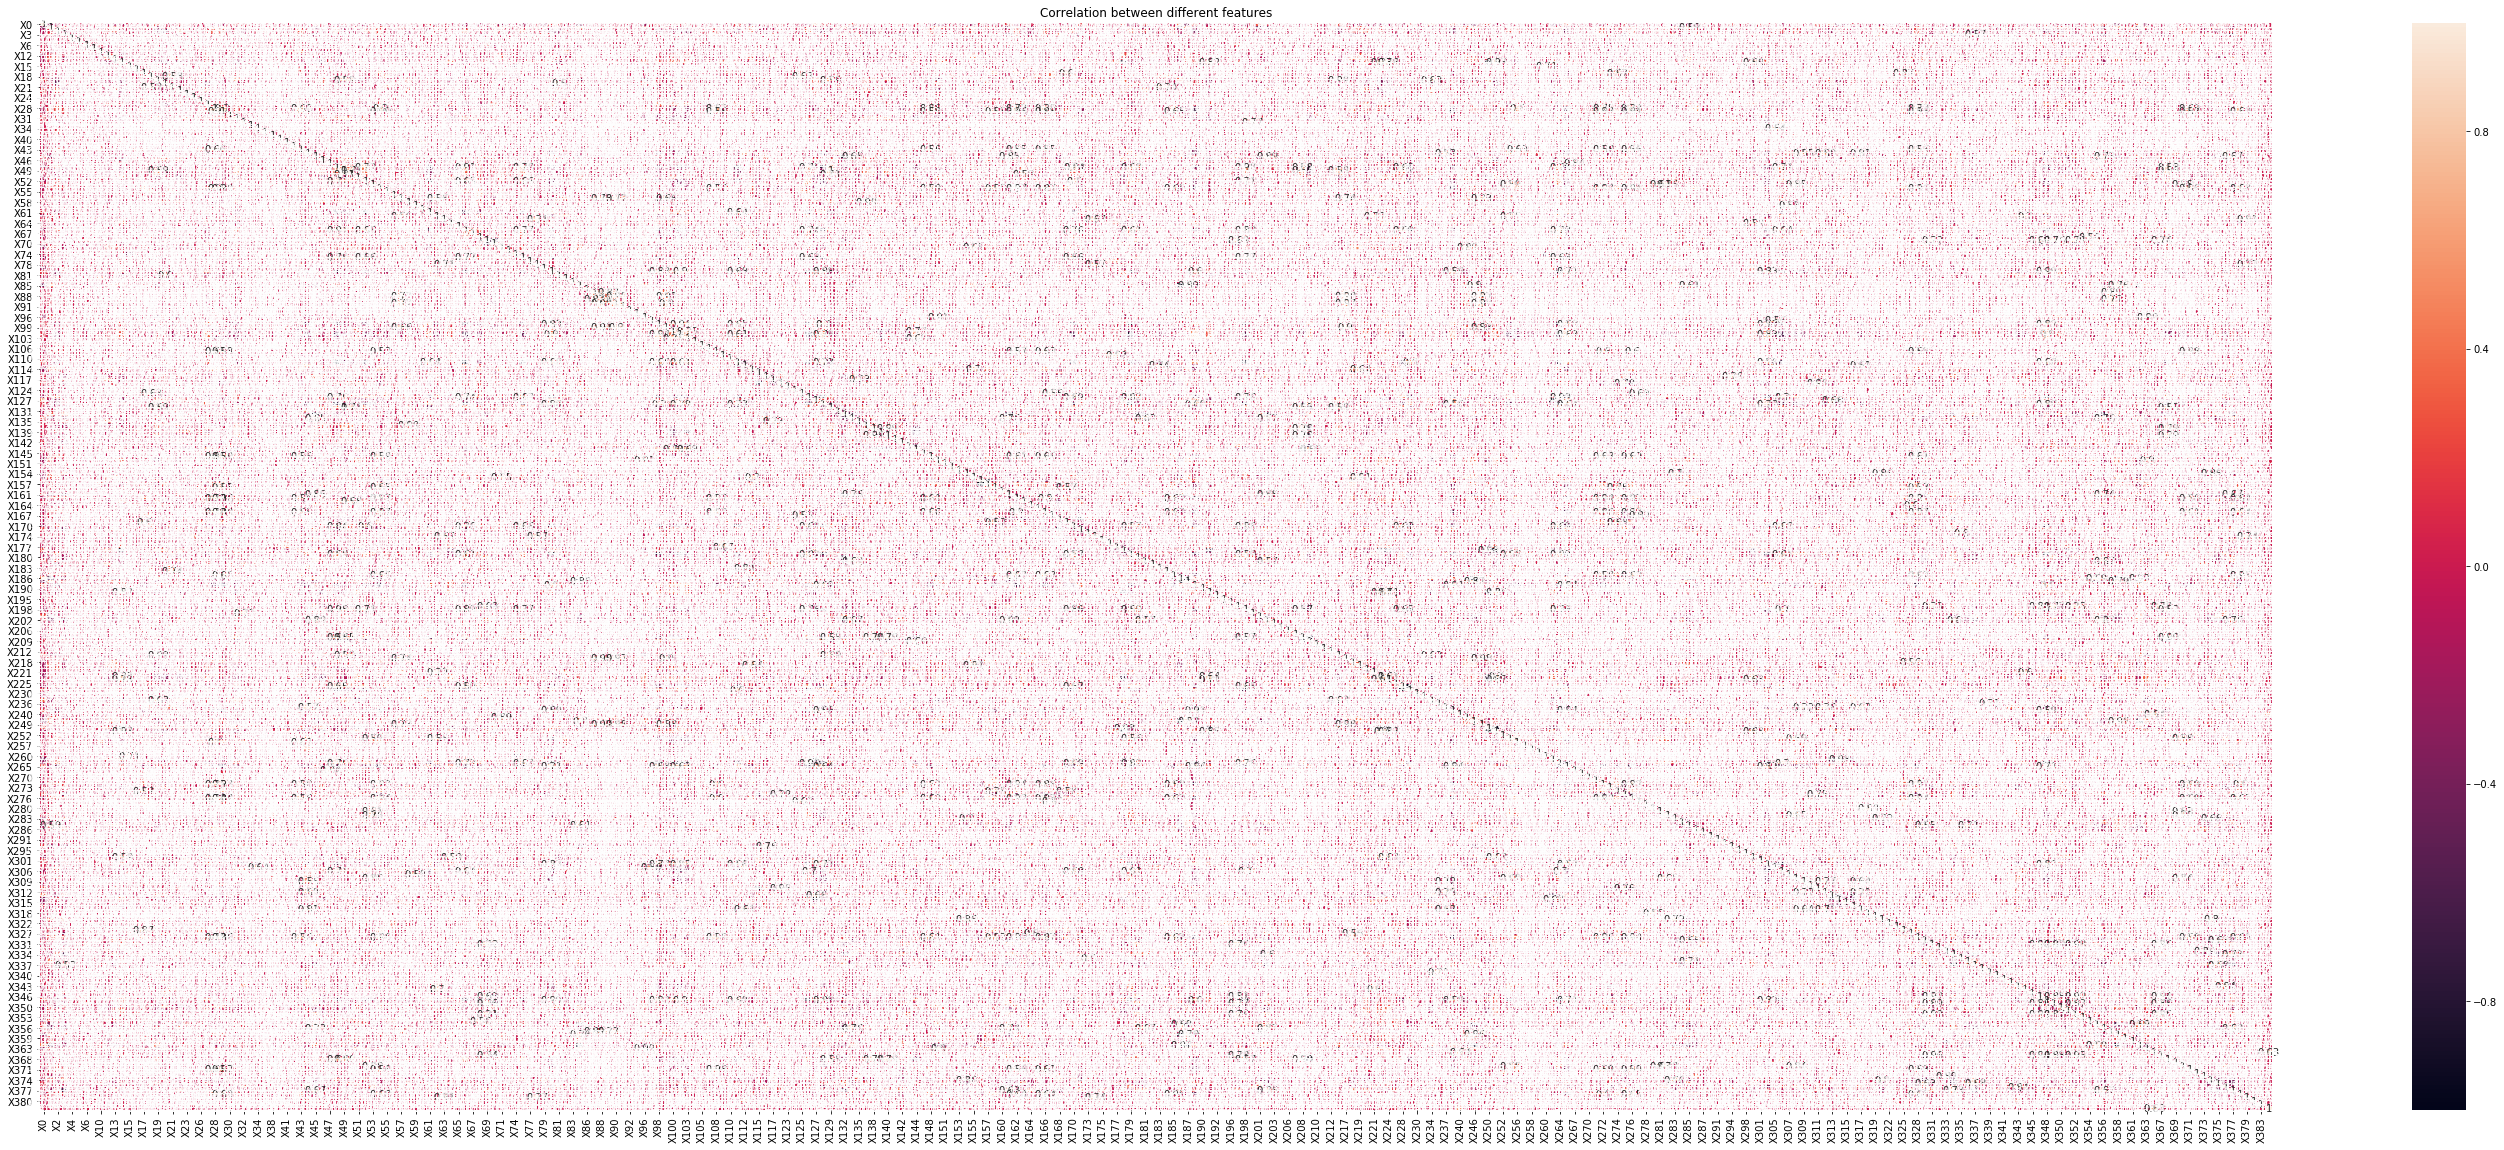

In [41]:
plt.figure(figsize=(50,20))
ax = sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation between different features")
plt.show()

In [128]:
grouped_X0 = X.groupby(['X0']).size()
grouped_X1 = X.groupby(['X1']).size()
grouped_X2 = X.groupby(['X2']).size()
grouped_X3 = X.groupby(['X3']).size()
grouped_X4 = X.groupby(['X4']).size()
grouped_X5 = X.groupby(['X5']).size()
grouped_X6 = X.groupby(['X6']).size()
grouped_X8 = X.groupby(['X8']).size()

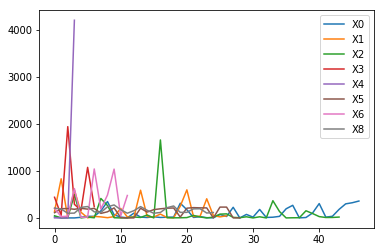

In [129]:
fig, ax = plt.subplots()
ax.plot(grouped_X0, label="X0")
ax.plot(grouped_X1, label="X1")
ax.plot(grouped_X2, label="X2")
ax.plot(grouped_X3, label="X3")
ax.plot(grouped_X4, label="X4")
ax.plot(grouped_X5, label="X5")
ax.plot(grouped_X6, label="X6")
ax.plot(grouped_X8, label="X8")
ax.legend()

plt.show()

#### The above graph shows X4 has the same values for 99.9% records, but we are gonna keep it as in test data it cn have more entries.

In [130]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std = scaler.fit_transform(X)

Text(0.5,0,'Number of components')

Text(0,0.5,'Cumulative explained variance')

Text(100,0.9,'100')

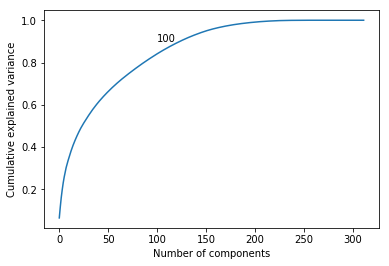

In [131]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('100',xy=(100,0.90))

In [132]:
pca.explained_variance_

array([2.01653089e+01, 1.60123788e+01, 1.41214854e+01, 1.14928590e+01,
       1.01518505e+01, 8.48477948e+00, 7.38121195e+00, 6.69028543e+00,
       5.43437608e+00, 5.06310366e+00, 4.82102153e+00, 4.63570681e+00,
       4.50776972e+00, 4.21716805e+00, 3.95856645e+00, 3.70837536e+00,
       3.51340665e+00, 3.43513712e+00, 3.23851942e+00, 3.16070848e+00,
       2.97380337e+00, 2.95159310e+00, 2.72059020e+00, 2.53406333e+00,
       2.52150787e+00, 2.41417396e+00, 2.32122099e+00, 2.30205164e+00,
       2.26807420e+00, 2.24337310e+00, 2.17815801e+00, 2.16534681e+00,
       2.11872360e+00, 2.07550762e+00, 2.02479111e+00, 1.94517498e+00,
       1.93086495e+00, 1.87354861e+00, 1.81328217e+00, 1.80024043e+00,
       1.75162328e+00, 1.71758570e+00, 1.66848237e+00, 1.63936423e+00,
       1.62882841e+00, 1.57918332e+00, 1.57390686e+00, 1.53594741e+00,
       1.50166634e+00, 1.46513487e+00, 1.45715623e+00, 1.43936699e+00,
       1.41724658e+00, 1.39930828e+00, 1.37842210e+00, 1.35151725e+00,
      

This cumulative explained variance graph helps us to choose the number of desired principal components 
- **90%** variation in the data is explaining by the first **100 principal components** 

<Container object of 312 artists>

Text(0,0.5,'Eigen Value')

Text(0.5,0,'Principal components')

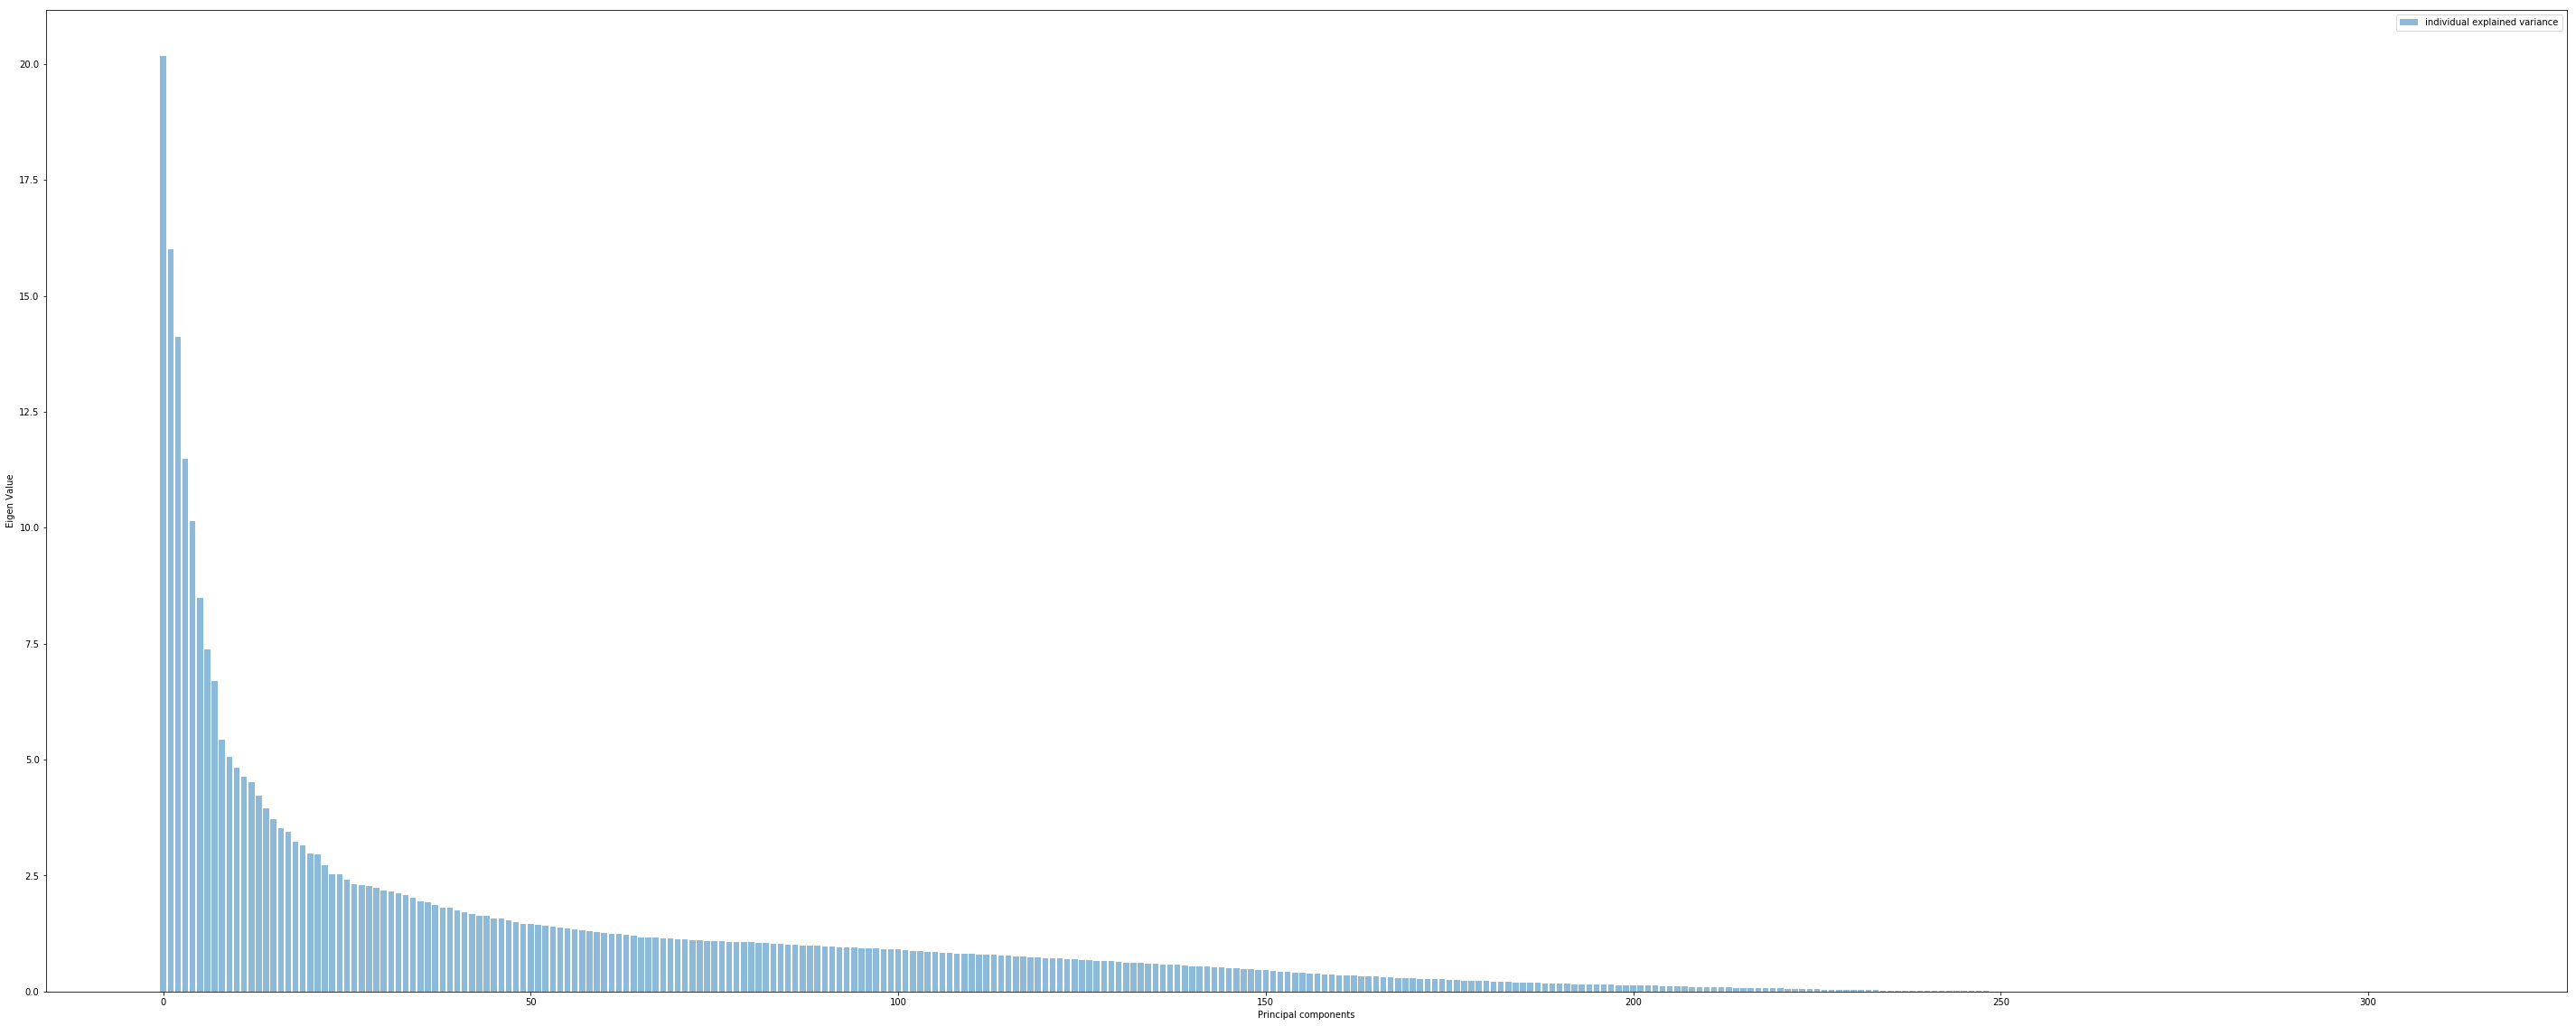

In [133]:
# individual explained variance
plt.figure(figsize=(50, 20))

plt.bar(range(312), pca.explained_variance_, alpha=0.5,
            label='individual explained variance')
plt.ylabel('Eigen Value')
plt.xlabel('Principal components')
plt.legend(loc='best')

Text(0.5,1,'Correlation between different components')

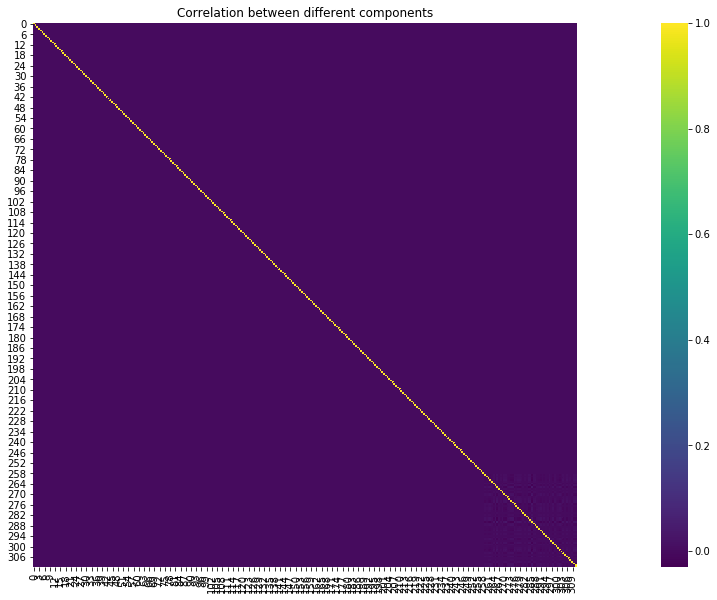

In [134]:
#PCA transforms a set of correlated variables into a set of linearly uncorrelated variables called principal components, 
#we can check the correlarion with a heat map of correlation matrix
plt.figure(figsize=(30, 10))
pca_transformed = PCA().fit_transform(X_std)
correlation = pd.DataFrame(pca_transformed).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different components')

In [135]:
#consider first 100 components as they are explaining the 90% of variation in the data
x_pca = PCA(n_components=100)
transformed_pca = x_pca.fit_transform(X_std)
pca_df = pd.DataFrame(transformed_pca)
pca_df.head(5)

0          1          2         3         4         5         6   \
0  12.605009  -2.676792  -0.787853 -1.937318  0.766055  6.829346  2.157183   
1  -0.215070   1.096900  -0.531233 -2.479339  0.840918  0.993367  0.448949   
2   9.509889  13.441601  10.991963  4.900676  2.456088 -1.922324 -2.193094   
3   6.762777  14.278810  13.686706  2.708840 -2.194164 -0.403513 -0.211598   
4   6.355237  14.082545  13.769505  2.892948 -2.393189 -0.487991 -0.683787   

         7         8          9     ...           90        91        92  \
0 -0.878912 -5.460087  10.146380    ...     1.770988 -4.386723 -2.887822   
1 -0.885732 -2.580400   0.281779    ...    -0.031281  0.374030 -0.549291   
2  2.598193  0.721832   1.478215    ...     2.436909  0.303707 -5.749771   
3  1.719813 -0.807823  -2.713867    ...     0.883659  0.602548 -0.212783   
4  0.732683  0.316613  -2.596904    ...     1.807861  0.797203 -4.400420   

         93        94        95        96        97         98        99  
0 -0.153388  8.323643  1.937816 -7.552155  6.441011  16.513867  0.582517  
1 -2.219364  2.862889 -1.063581  1.448689  1.422559   1.167324 -2.459326  
2 -5.358209  0.892605 -2.243691 -2.796992 -0.172896   1.035223 -1.377981  
3  1.696504  0.035276 -1.060496  0.575558  1.612570  -0.215553  0.432575  
4 -3.337357  0.157013 -2.420237 -0.638012  2.024269   1.121630 -0.427943  

[5 rows x 100 columns]

In [136]:
test_df=pd.read_csv(path + 'test.csv')
sample_df=pd.read_csv(path+'sample_submission.csv')

In [137]:
# Do dummy coding
for col in test_df.columns:
    if test_df[col].dtype =='object':
        test_df[col]=pd.Categorical(test_df[col]).codes

test_df.head()
sample_df.head()

ID  X0  X1  X2  X3  X4  X5  X6  X8  X10  ...   X375  X376  X377  X378  \
0   1  21  23  34   5   3  26   0  22    0  ...      0     0     0     1   
1   2  42   3   8   0   3   9   6  24    0  ...      0     0     1     0   
2   3  21  23  17   5   3   0   9   9    0  ...      0     0     0     1   
3   4  21  13  34   5   3  31  11  13    0  ...      0     0     0     1   
4   5  45  20  17   2   3  30   8  12    0  ...      1     0     0     0   

   X379  X380  X382  X383  X384  X385  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     0     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 377 columns]

ID           y
0   1  100.669318
1   2  100.669318
2   3  100.669318
3   4  100.669318
4   5  100.669318

In [138]:
test_df.drop(cols_to_drop, axis=1, inplace=True)

In [139]:
test_df.drop(redundant_cols, axis=1, inplace=True)

#We can get rid of ID from our dataframe as it is of no significance in analysis
test_df.drop('ID', axis=1, inplace=True)
sample_df.drop('ID', axis=1, inplace=True)

In [140]:
test_df.shape

(4209, 312)

In [141]:
scaler=StandardScaler()
X_std_test = scaler.fit_transform(test_df)

x_pca_test = PCA(n_components=100)
transformed_pca_test = x_pca.fit_transform(X_std_test)
pca_df_test = pd.DataFrame(transformed_pca_test)
pca_df_test.head(5)

0         1          2         3         4         5         6   \
0  6.823880 -8.096929  17.653950  1.847437  2.957479 -0.495277 -0.151558   
1  0.895979  9.702255   2.798660  1.452965 -5.094449 -3.477139 -1.636297   
2  4.911053 -8.277379  12.956648  3.665056  1.324543 -0.433368 -3.222150   
3  6.308664 -8.402869  18.562179  1.681444  3.884394  0.094801  0.195375   
4 -1.791152 -5.120310  -3.653763  1.396339 -2.133349  1.151694 -1.914208   

         7         8         9     ...           90        91        92  \
0  0.464508 -1.502878 -2.356177    ...     5.052502  1.273464 -2.010790   
1  4.752797  0.779272  2.350082    ...     4.689202  1.778933 -2.256282   
2  3.459842  2.473676  1.235230    ...     6.274623  2.238162 -2.653860   
3  0.165096 -2.133942 -2.948794    ...    -1.695229  3.473304 -0.749531   
4  0.627894  0.059690 -0.175776    ...    -0.494072 -0.055238  0.619254   

         93        94        95        96        97        98        99  
0 -3.169939  6.594023 -1.334409 -3.463215 -2.515097  0.825176  1.340939  
1 -2.671427  6.271589 -0.878357 -3.564979 -2.788891  1.480690  1.304278  
2 -2.645739  6.485960  1.092426 -4.010769 -3.068765  1.474958  0.546742  
3  3.068938  1.509915  0.863804  7.198954 -7.922056  1.109028  0.996902  
4 -0.895568 -0.371104  0.294243  1.359111  0.156990 -0.906074 -1.122964  

[5 rows x 100 columns]

In [1]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn import metrics

In [143]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('NB', BayesianRidge()))
models.append(('SVR', SVR()))
models

[('LR',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)),
 ('KNN',
  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform')),
 ('DT',
  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best')),
 ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0, warm_start=False)

In [161]:
# evaluate each model in turn
results = []
names = []
mse = []
result_msg = []
color = {'LR':'b', 'KNN':'g', 'DT': 'r', 'RF': 'y', 'NB':'o', 'SVR': 'p'}
idx = 0

for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=2)
    cv_results = model_selection.cross_val_score(model, pca_df, y, cv=kfold, scoring="neg_mean_squared_error")
    results.append(cv_results)
    names.append(name)
    result_msg.append("%s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))
    
    model.fit(pca_df, y)
    prediction = model.predict(pca_df_test)
    print()
    mse.append({name: metrics.mean_squared_error(sample_df, prediction)})
    

   
result_msg    
mse
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

['LR: -84.638764 (+/- 22.507825)',
 'KNN: -97.350834 (+/- 23.207610)',
 'DT: -175.372710 (+/- 22.983180)',
 'RF: -96.277139 (+/- 19.729363)',
 'NB: -80.647754 (+/- 23.461049)',
 'SVR: -97.650021 (+/- 28.240115)']

[{'LR': 88.12617386774615},
 {'KNN': 76.10124446433144},
 {'DT': 162.36813113541436},
 {'RF': 82.3311244355281},
 {'NB': 84.73758937870552},
 {'SVR': 12.630825625119483}]

[array([ -73.77460148, -127.69833232,  -78.66427029,  -81.05174596,
         -62.00486816]),
 array([ -90.39124761, -142.03446542,  -87.11378986,  -92.69959006,
         -74.51507496]),
 array([-147.19896985, -190.32348529, -194.96436519, -147.49287488,
        -196.88385691]),
 array([ -89.35563951, -131.96378404,  -89.75057206,  -98.09851809,
         -72.21718014]),
 array([ -69.94180042, -125.05959328,  -72.24508384,  -79.70819123,
         -56.28410001]),
 array([ -93.73143938, -146.64354479,  -85.28447756, -102.3184112 ,
         -60.27223126])]

In [162]:
print("Root mean squared error with 95% confidence interval:")
for MSE in results:
    RMSE = np.sqrt(MSE*-1)
    print("{:.3f} (+/- {:.3f})".format(RMSE.mean(), RMSE.std()*2))
    print("")

Root mean squared error with 95% confidence interval:
9.127 (+/- 2.309)

9.804 (+/- 2.224)

13.213 (+/- 1.762)

9.763 (+/- 1.954)

8.895 (+/- 2.468)

9.781 (+/- 2.816)



In [154]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Text(0.5,0.98,'Algorithm Comparison')

{'boxes': [<matplotlib.lines.Line2D at 0x1fa16d146d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa16d17128>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fa16d17da0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1fa16d17978>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1fa16d14828>,
  <matplotlib.lines.Line2D at 0x1fa16d310b8>]}

[Text(0,0,'LR'),
 Text(0,0,'KNN'),
 Text(0,0,'DT'),
 Text(0,0,'RF'),
 Text(0,0,'NB'),
 Text(0,0,'SVR')]

No handles with labels found to put in legend.
